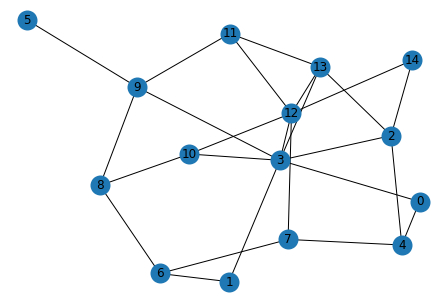

In [4]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
# Graph implementation
def generate_graph(cluster_sizes=[100,100], pin=0.5, pout=0.01, seed=0):
    """Generate a random connected graph"""
    probs = np.array([[pin, pout, pout],[pout, pin, pout],[pout, pout, pin]])
    while True:
        g = nx.stochastic_block_model(cluster_sizes, probs, seed=0)
        if nx.algorithms.components.is_connected(g):
            return g


cluster_sizes = [3, 3, 3]
#features_sizes = [8, 7, 6, 5]
pin = 0.5
pout = 0.1
seed = 0
alpha = 1e-2
lamda = 0#1e-1#1e-3
eta = 5 * 1e-2

batch_size = 50
epochs = 1
it = 2000
G = generate_graph(cluster_sizes, pin, pout, seed)

# Set a random seed for reproducibility

nx.draw(G, with_labels=True, node_size=100, alpha=1, linewidths=10)
plt.show()

In [5]:
def degrees(A):
    """Return the degrees of each node of a graph from its adjacency matrix"""
    return np.sum(A, axis=0).reshape(A.shape[0], 1)

def node_degree(n, G):
    cnt = 0
    for i in G.neighbors(n):
        cnt += 1
    return cnt

def get_neighbors(n, G):
    neighbors_list = []
    for i in G.neighbors(n):
        neighbors_list.append(int(i))
    return neighbors_list

In [6]:
datapoints = {}
count = 0
W1 = np.array([2, 2])
W2 = np.array([-2, 2])
W = [W1, W2]
m = 200
n = 2
noise_sd = 0.001
for i, cluster_size in enumerate(cluster_sizes):
    for j in range(cluster_size):
        features = np.random.normal(loc=0.0, scale=1.0, size=(m, n))
        label = np.dot(features, W[i]) + np.random.normal(0,noise_sd)
        datapoints[count] = {
                'features': features,
                'degree': node_degree(count, G),
                'label': label,
                'neighbors': get_neighbors(count, G),
                'exact_weights': W[i]
            }
        count += 1

IndexError: list index out of range

KeyError: 11

<Figure size 720x432 with 0 Axes>

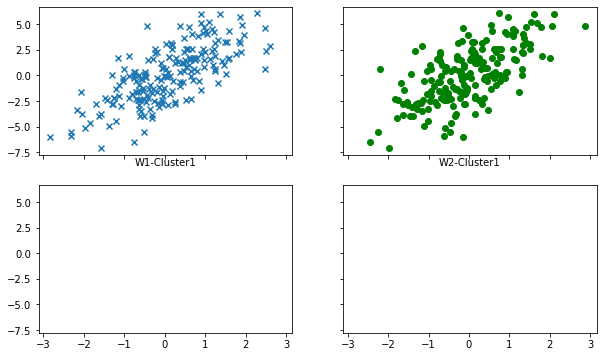

In [7]:
plt.rcParams['figure.figsize'] = [10, 6]
f = plt.figure() 


f, axes = plt.subplots(nrows = 2, ncols = 2, sharex=True, sharey = True)

axes[0][0].scatter(datapoints[0]['features'][:, 0],datapoints[0]['label'], marker = "x")
axes[0][0].set_xlabel('W1-Cluster1', labelpad = 3)

axes[0][1].scatter(datapoints[0]['features'][:, 1],datapoints[0]['label'], marker = "o", color='green')
axes[0][1].set_xlabel('W2-Cluster1', labelpad = 3)

axes[1][0].scatter(datapoints[11]['features'][:, 0],datapoints[11]['label'], marker = "*")
axes[1][0].set_xlabel('W1-Cluster2', labelpad = 3)

axes[1][1].scatter(datapoints[11]['features'][:, 1],datapoints[11]['label'], marker = "+", color='green')
axes[1][1].set_xlabel('W2-Cluster2', labelpad = 3)


In [28]:
#rel_err_dfed = np.load('relative_error_dfedu0_01_pout0_1.npy').ravel()
#rel_err_sheave_fml = np.load('relative_error_sheave_fml1_pout0_1.npy').ravel()
#rel_err_sheave_fml_no_comm = np.load('relative_error_sheave_fml0_pout0_1.npy').ravel()


#loss_dfed = np.load('training_loss_dfedu0_01_pout0_1.npy').ravel()
loss_sheave_fml = np.load('training_loss_sheave_fml0_01_pout0_1.npy').ravel()
loss_sheave_fml_no_comm = np.load('training_loss_sheave_fml0_pout0_1.npy').ravel()


In [29]:
plt.semilogy(rel_err_sheave_fml_no_comm, label='No Communication') # dFedU
plt.semilogy(rel_err_sheave_fml, label='FedSheaves')
















plt.xlabel('Number of Communication Rounds') # Federated Sheaves
plt.ylabel('Relative Error')
legend = plt.legend(loc='upper right', shadow=True, fontsize='x-large')
plt.grid(True)
#plt.savefig("Relative Error.pdf")
#plt.ylim([10**(-5),0.5])

NameError: name 'rel_err_sheave_fml_no_comm' is not defined

In [30]:
loss_sheave_fml[-1]

3.7247019462831568

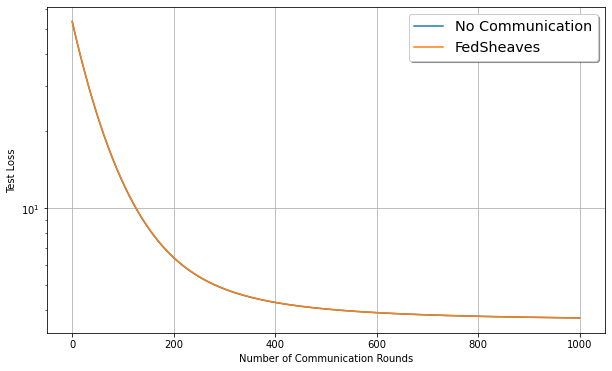

In [31]:
plt.semilogy(loss_sheave_fml_no_comm, label='No Communication') # dFedU
plt.semilogy(loss_sheave_fml, label='FedSheaves')
















plt.xlabel('Number of Communication Rounds') # Federated Sheaves
plt.ylabel('Test Loss')
legend = plt.legend(loc='upper right', shadow=True, fontsize='x-large')
plt.grid(True)
#plt.savefig("Relative Error.pdf")
#plt.ylim([10**(-5),0.5])

In [32]:
in_cluster_proj_norm = np.load('in_cluster_proj_norm_sheave_fml0_01_pout0_1.npy').ravel()
out_cluster_proj_norm = np.load('out_cluster_proj_norm_sheave_fml0_01_pout0_1.npy').ravel()


in_cluster_proj_diff_norm = np.load('in_cluster_proj_diff_norm_sheave_fml0_01_pout0_1.npy').ravel()
out_cluster_proj_diff_norm = np.load('out_cluster_proj_diff_norm_sheave_fml0_01_pout0_1.npy').ravel()



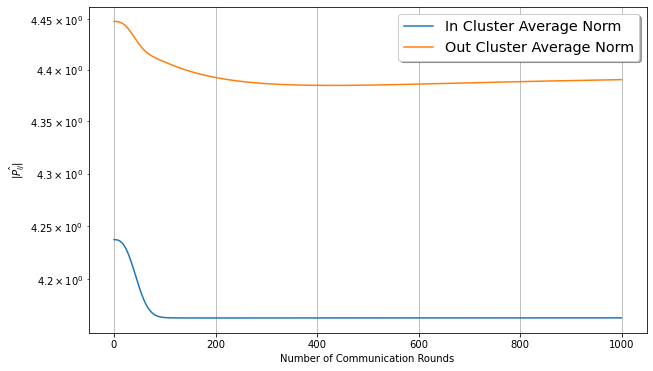

In [33]:
plt.semilogy(in_cluster_proj_norm, label='In Cluster Average Norm') # dFedU
plt.semilogy(out_cluster_proj_norm, label='Out Cluster Average Norm')







plt.xlabel('Number of Communication Rounds') # Federated Sheaves
plt.ylabel(r'$\hat{|P_{ij}|}$')
legend = plt.legend(loc='upper right', shadow=True, fontsize='x-large')
plt.grid(True)
#plt.savefig("Relative Error.pdf")
#plt.ylim([10**(-5),0.5])

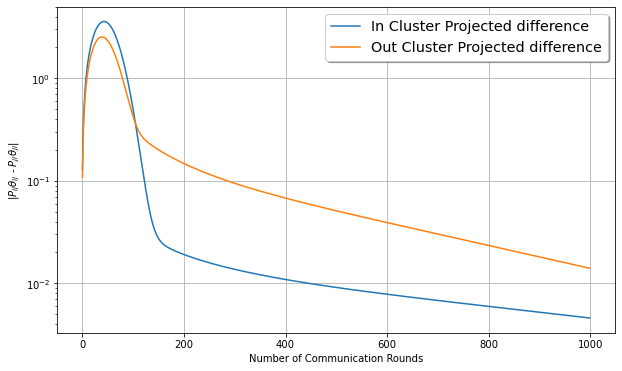

In [34]:
plt.semilogy(in_cluster_proj_diff_norm, label='In Cluster Projected difference') # dFedU
plt.semilogy(out_cluster_proj_diff_norm, label='Out Cluster Projected difference')







plt.xlabel('Number of Communication Rounds') # Federated Sheaves
plt.ylabel(r'|$P_{ij}\theta_{ij}$ - $P_{ji}\theta_{ji}$|')
legend = plt.legend(loc='upper right', shadow=True, fontsize='x-large')
plt.grid(True)
#plt.savefig("Relative Error.pdf")
#plt.ylim([10**(-5),0.5])

0
1
2


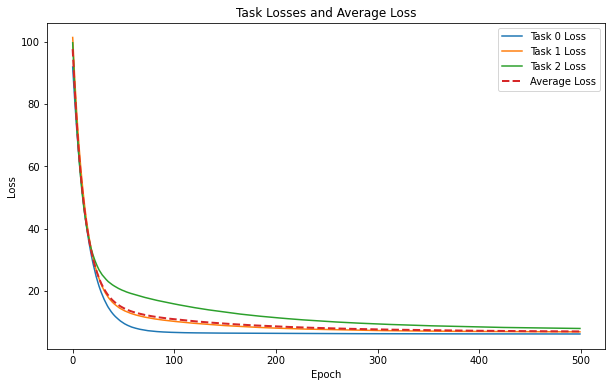

In [178]:
task_loss = {'0':[],
                '1':[],
                '2':[]}
task_rel_error = {'0':[],
            '1':[],
            '2':[]}

# Load and plot each task loss
lamda = 0
all_task_losses = []
fig, ax = plt.subplots()
for key in task_loss.keys():
    # Load the NumPy array
    print(key)
    array_loss = np.load('training_loss_sheave_fml_task' + key + '_' + str(lamda).replace('.', '_') + '_pout' + str(pout).replace('.', '_') + '.npy')
    
    # Append the task loss to the list
    all_task_losses.append(array_loss)
    
    # Plot the task loss
    plt.plot(array_loss, label='Task ' + key + ' Loss')

# Calculate and plot the average loss
average_loss = np.mean(all_task_losses, axis=0)
plt.plot(average_loss, label='Average Loss', linestyle='--', linewidth=2)

# Add labels and legend
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Task Losses and Average Loss')
plt.legend()

# Show the plot
plt.show()

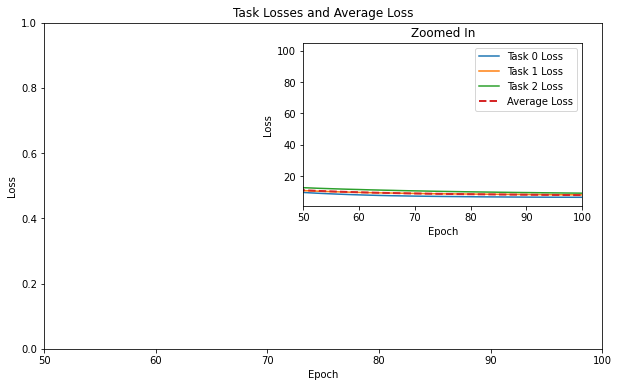

In [116]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

# Your data and plot code here...

# Set up the main axes
fig, ax = plt.subplots()

# Your existing code for plotting task losses and average loss...

# Add labels and legend
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Task Losses and Average Loss')

# Set the x-axis range for zooming
zoom_start = 50
zoom_end = 100
ax.set_xlim(zoom_start, zoom_end)

# Create a zoomed-in inset axes
axins = inset_axes(ax, width="50%", height="50%", loc='upper right', borderpad=2)

# Plot the zoomed-in part on the inset axes
for key in task_loss.keys():
    array_loss = np.load('training_loss_sheave_fml_task' + key + '_' + str(lamda).replace('.', '_') + '_pout' + str(
        pout).replace('.', '_') + '.npy')
    axins.plot(array_loss, label='Task ' + key + ' Loss')

# Plot the average loss on the inset axes
axins.plot(average_loss, label='Average Loss', linestyle='--', linewidth=2)

# Set the x-axis range for the zoomed-in part
axins.set_xlim(zoom_start, zoom_end)

# Add labels and legend for the inset axes
axins.set_xlabel('Epoch')
axins.set_ylabel('Loss')
axins.set_title('Zoomed In')

# Show the plot
plt.legend()
plt.show()

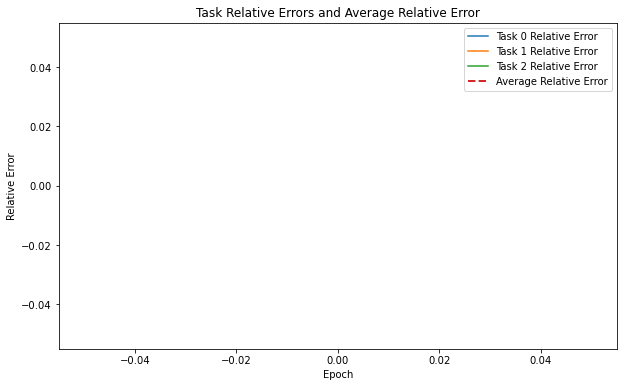

In [64]:
# Initialize a list to store all task relative errors
all_task_rel_errors = []

# Load and plot each task relative error
for key in task_rel_error.keys():
    # Load the NumPy array
    array_rel_error = np.load('relative_error_sheave_fml_task' + key + '_' + str(lamda).replace('.', '_') + '_pout' + str(pout).replace('.', '_') + '.npy')
    
    # Append the task relative error to the list
    all_task_rel_errors.append(array_rel_error)
    
    # Plot the task relative error
    plt.plot(array_rel_error, label='Task ' + key + ' Relative Error')

# Calculate and plot the average relative error
average_rel_error = np.mean(all_task_rel_errors, axis=0)
plt.plot(average_rel_error, label='Average Relative Error', linestyle='--', linewidth=2)

# Add labels and legend
plt.xlabel('Epoch')
plt.ylabel('Relative Error')
plt.title('Task Relative Errors and Average Relative Error')
plt.legend()

# Show the plot
plt.show()